# Логистическая регрессия #

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('default')

## Логистическая регрессия в SkLearn ##

In [2]:
diabetes_data = pd.read_csv('data/Unit2_diabetes_cleaned.csv')
display(diabetes_data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


In [3]:
diabetes_data.shape

(757, 8)

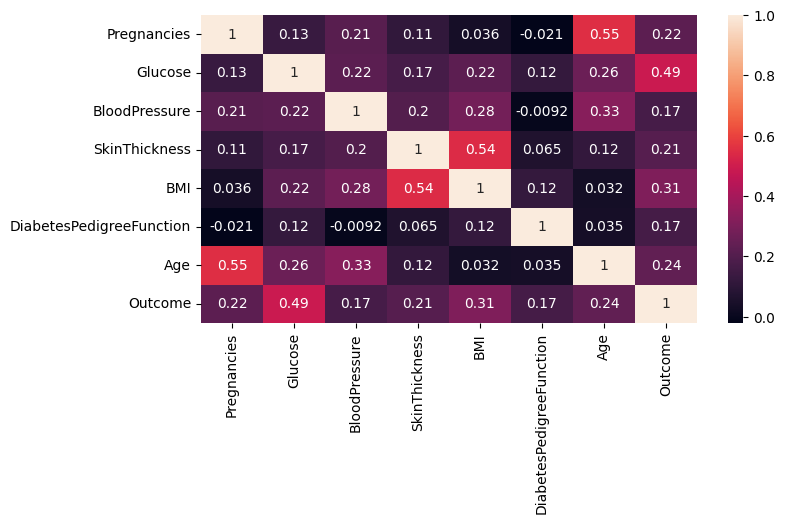

In [4]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(diabetes_data.corr(), annot=True);

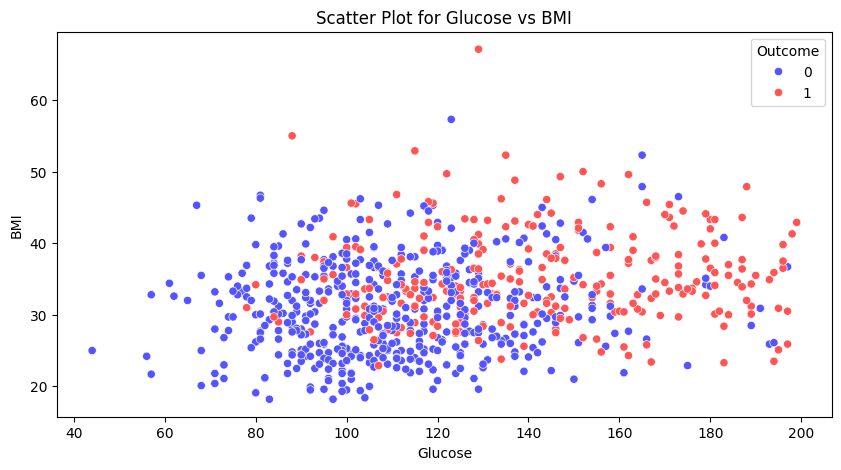

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(
    data=diabetes_data,
    x='Glucose',
    y='BMI',
    hue='Outcome',
    palette='seismic',
    ax=ax
)
ax.set_title('Scatter Plot for Glucose vs BMI');

#### Построение разделяющей плоскости с помощью логистической регрессии ####

In [6]:
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

In [7]:
from sklearn import linear_model

# Создание объекта класса LogisticRegression
log_reg_2d = linear_model.LogisticRegression(random_state=42)

# Обучение модели, минимизируя logloss
log_reg_2d.fit(X, y)

# Вывод результирующих коэффициентов
print(f'w0: {log_reg_2d.intercept_}') ##### свободный член w0
print(f'w1, w2: {log_reg_2d.coef_}')  ##### остальные параметры модели w1, w2, ..., wm

w0: [-8.24898965]
w1, w2: [[0.03779275 0.0875742 ]]


In [8]:
# Значения концентрации глюкозы и индекса массы тела для конкретного пациента
x_new = pd.DataFrame({'Glucose': [180], 'BMI': [51]})

# Предсказание вероятностей:
y_new_probe_predict = log_reg_2d.predict_proba(x_new)
print(f'Predicted probabilities: {np.round(y_new_probe_predict, 2)}')

Predicted probabilities: [[0.05 0.95]]


In [9]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    ''' Генерируем координатную сетку из всех возможных значений для признаков
        Glucose изменяется от x1_min = 44 до x2_max = 199,
        BMI — от x2_min = 18.2 до x2_max = 67.1
        Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    '''
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

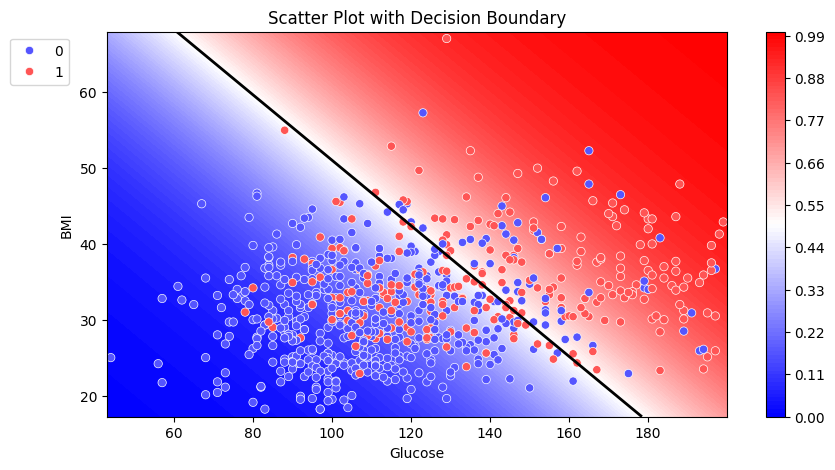

In [10]:
plot_probabilities_2d(X, y, log_reg_2d)

#### Использование признаков по максимуму ####

In [11]:
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [12]:
# Создание объекта класса LogisticRegression
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000)

# Обучение модели, минимизируя logloss
log_reg_full.fit(X, y)

# Предсказание класса
y_pred = log_reg_full.predict(X)

In [13]:
# Создание временной таблицы X
X_temp = X.copy()

# Добавление в эту таблицу результат предсказания
X_temp['Prediction'] = y_pred
display(X_temp.tail())

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Prediction
752,5,139.0,64.0,35.0,28.6,0.411,26,0
753,1,96.0,122.0,29.0,22.4,0.207,27,0
754,10,101.0,86.0,37.0,45.6,1.136,38,1
755,0,141.0,72.0,29.0,42.4,0.205,29,1
756,0,125.0,96.0,29.0,22.5,0.262,21,0


# Метрики классификации. Преимущества и недостатки логистической регрессии #

## Расчёт метрик на Python ##

In [14]:
from sklearn import metrics

In [15]:
# Предсказание моделью, обученной на двух признаках
y_pred1 = log_reg_2d.predict(diabetes_data[['Glucose', 'BMI']])

# Предсказание моделью, обученной на всех признаках
y_pred2 = log_reg_full.predict(diabetes_data.drop('Outcome', axis=1))

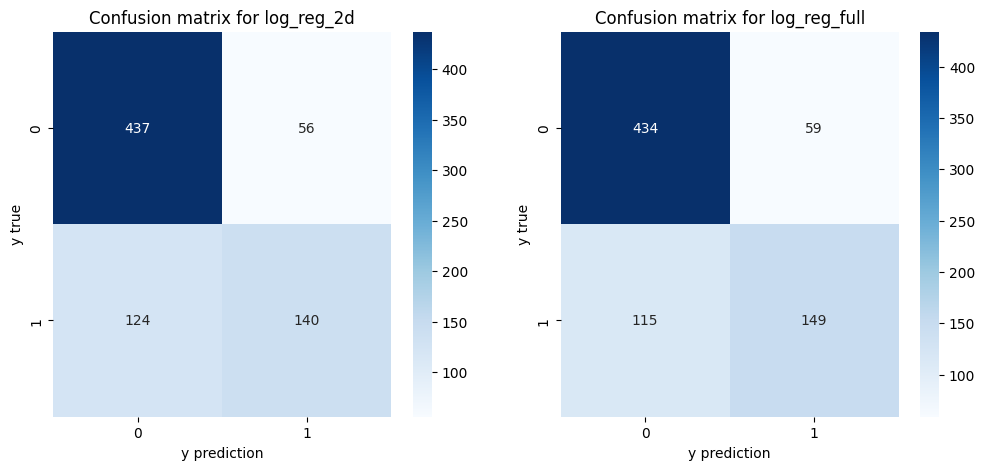

In [16]:
# Построение матриц ошибок для каждой из моделей
confusion_matrix1 = metrics.confusion_matrix(y, y_pred1)
confusion_matrix2 = metrics.confusion_matrix(y, y_pred2)

# Визуализация матриц ошибок
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #фигура + 2 координатные плоскости
sns.heatmap(confusion_matrix1, annot=True, fmt='', ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion matrix for log_reg_2d')
axes[0].set_xlabel('y prediction')
axes[0].set_ylabel('y true')
sns.heatmap(confusion_matrix2, annot=True, fmt='', ax=axes[1], cmap='Blues')
axes[1].set_title('Confusion matrix for log_reg_full')
axes[1].set_xlabel('y prediction')
axes[1].set_ylabel('y true');

#### Расчёт метрик для модели log_reg_2d, обученной на двух факторах — Glucose и BMI ####

In [17]:
# Модель log_reg_2d:
# Рассчёт accuracy
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y, y_pred1)))

# Рассчёт precision
print('Precision: {:.2f}'.format(metrics.precision_score(y, y_pred1)))

# Рассчёт recall
print('Recall: {:.2f}'.format(metrics.recall_score(y, y_pred1)))

# Рассчёт F1-меры
print('F1 score: {:.2f}'.format(metrics.f1_score(y, y_pred1)))

Accuracy: 0.76
Precision: 0.71
Recall: 0.53
F1 score: 0.61


#### Расчёт метрик для модели log_reg_full, обученной на всех доступных факторах ####

In [18]:
# Модель log_reg_full:
#Рассчёт accuracy
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y, y_pred2)))

# Рассчёт precision
print('Precision: {:.2f}'.format(metrics.precision_score(y, y_pred2)))

# Рассчёт recall
print('Recall: {:.2f}'.format(metrics.recall_score(y, y_pred2)))

# Рассчёт F1-меры
print('F1 score: {:.2f}'.format(metrics.f1_score(y, y_pred2)))

Accuracy: 0.77
Precision: 0.72
Recall: 0.56
F1 score: 0.63


In [19]:
print(metrics.classification_report(y, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       493
           1       0.72      0.56      0.63       264

    accuracy                           0.77       757
   macro avg       0.75      0.72      0.73       757
weighted avg       0.76      0.77      0.76       757



In [20]:
# Вероятность наличия диабета для каждого из пациентов
# Интересует только вероятность класса (второй столбец)
y_proba_pred = log_reg_full.predict_proba(diabetes_data.drop('Outcome', axis=1))[:, 1]

# Для удобства завернуть numpy-массив в Pandas Series
y_proba_pred = pd.Series(y_proba_pred)

# Создание списков, в которых будем хранить значения метрик
recall_scores = []
precision_scores = []
f1_scores = []

# Генерация набора вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)

# В цикле перебор сгенерированных порогов
for threshold in thresholds:
    ##### Пациенты, для которых вероятность наличия диабета > threshold, относятся к классу 1
    ##### В противном случае — к классу 0
    y_pred = y_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    ##### Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y, y_pred))
    precision_scores.append(metrics.precision_score(y, y_pred))
    f1_scores.append(metrics.f1_score(y, y_pred))

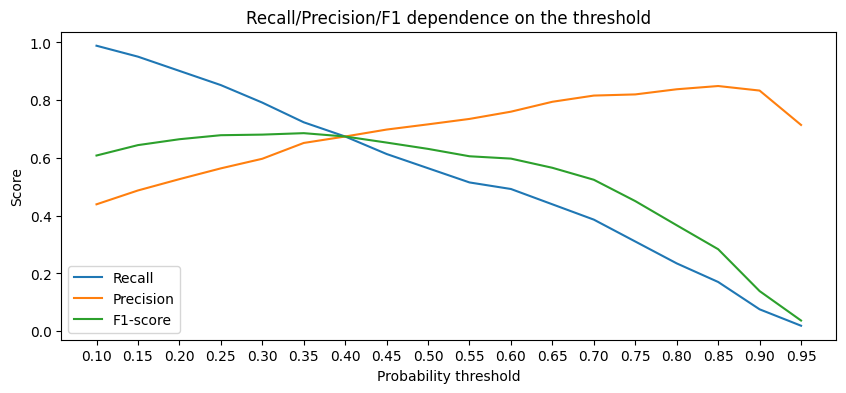

In [21]:
# Визуализация метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) ##### фигура + координатная плоскость

# Линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')

# Линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')

# Линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
 
ax.set_title('Recall/Precision/F1 dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
ax.set_xticks(thresholds) 
ax.legend();

#### Предсказание класса ####

In [22]:
# Оптимальный порог вероятностей
threshold_opt = 0.4

# Пациенты, для которых вероятность наличия диабета > 0.4, относятся к классу 1
# В противном случае — к классу 0
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)

# Метрика
print(metrics.classification_report(y, y_pred_opt))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       493
           1       0.67      0.67      0.67       264

    accuracy                           0.77       757
   macro avg       0.75      0.75      0.75       757
weighted avg       0.77      0.77      0.77       757



# Мультиклассовая классификация #

In [23]:
penguins_data = sns.load_dataset('penguins')
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [25]:
penguins_data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64